In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [32]:
admission=pd.read_csv( r"C:\Users\91939\Desktop\B16\a.csv")

missing_values = admission.isnull().sum()


# Remove rows with missing values
admission.dropna(axis=0, inplace=True)  # Remove rows with missing values
# Remove columns with missing values
admission.dropna(axis=1, inplace=True)  # Remove columns with missing values
missing_values



Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [33]:
# Identifies any duplicate Rows
duplicate_rows = admission[admission.duplicated()]
# Following step removes duplicate rows
admission.drop_duplicates(inplace=True)
duplicate_rows

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [34]:
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
admission.drop('Serial No',axis=1,inplace=True)


In [36]:
admission.head(4)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80


In [37]:
admission.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [38]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [39]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [40]:
admission.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


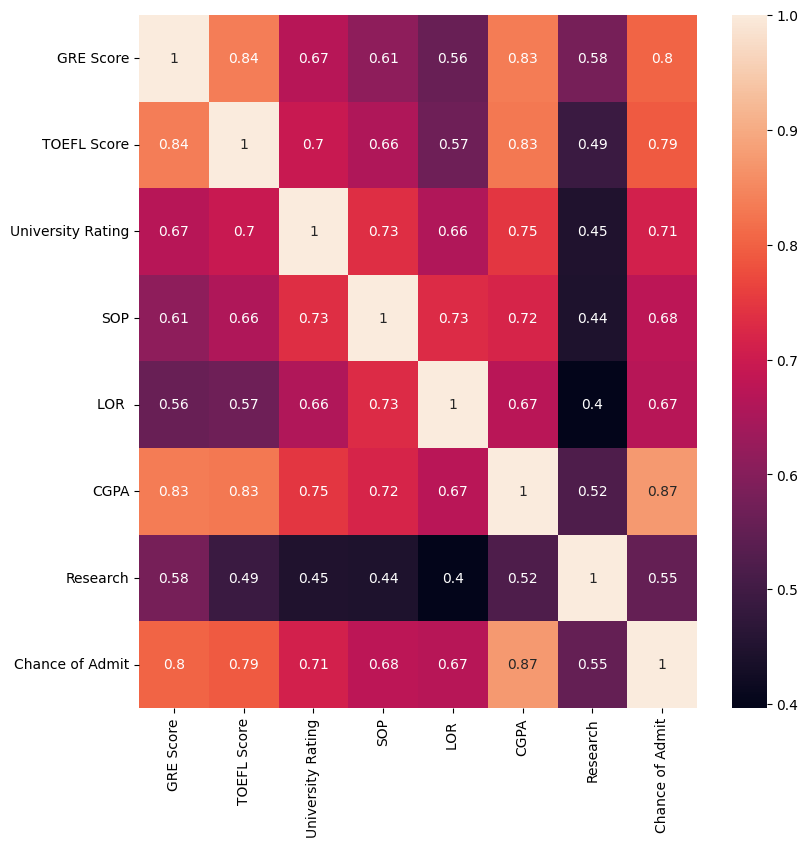

In [41]:
# Heatmap for correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = admission.corr()
plt.figure(figsize=(9,9,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

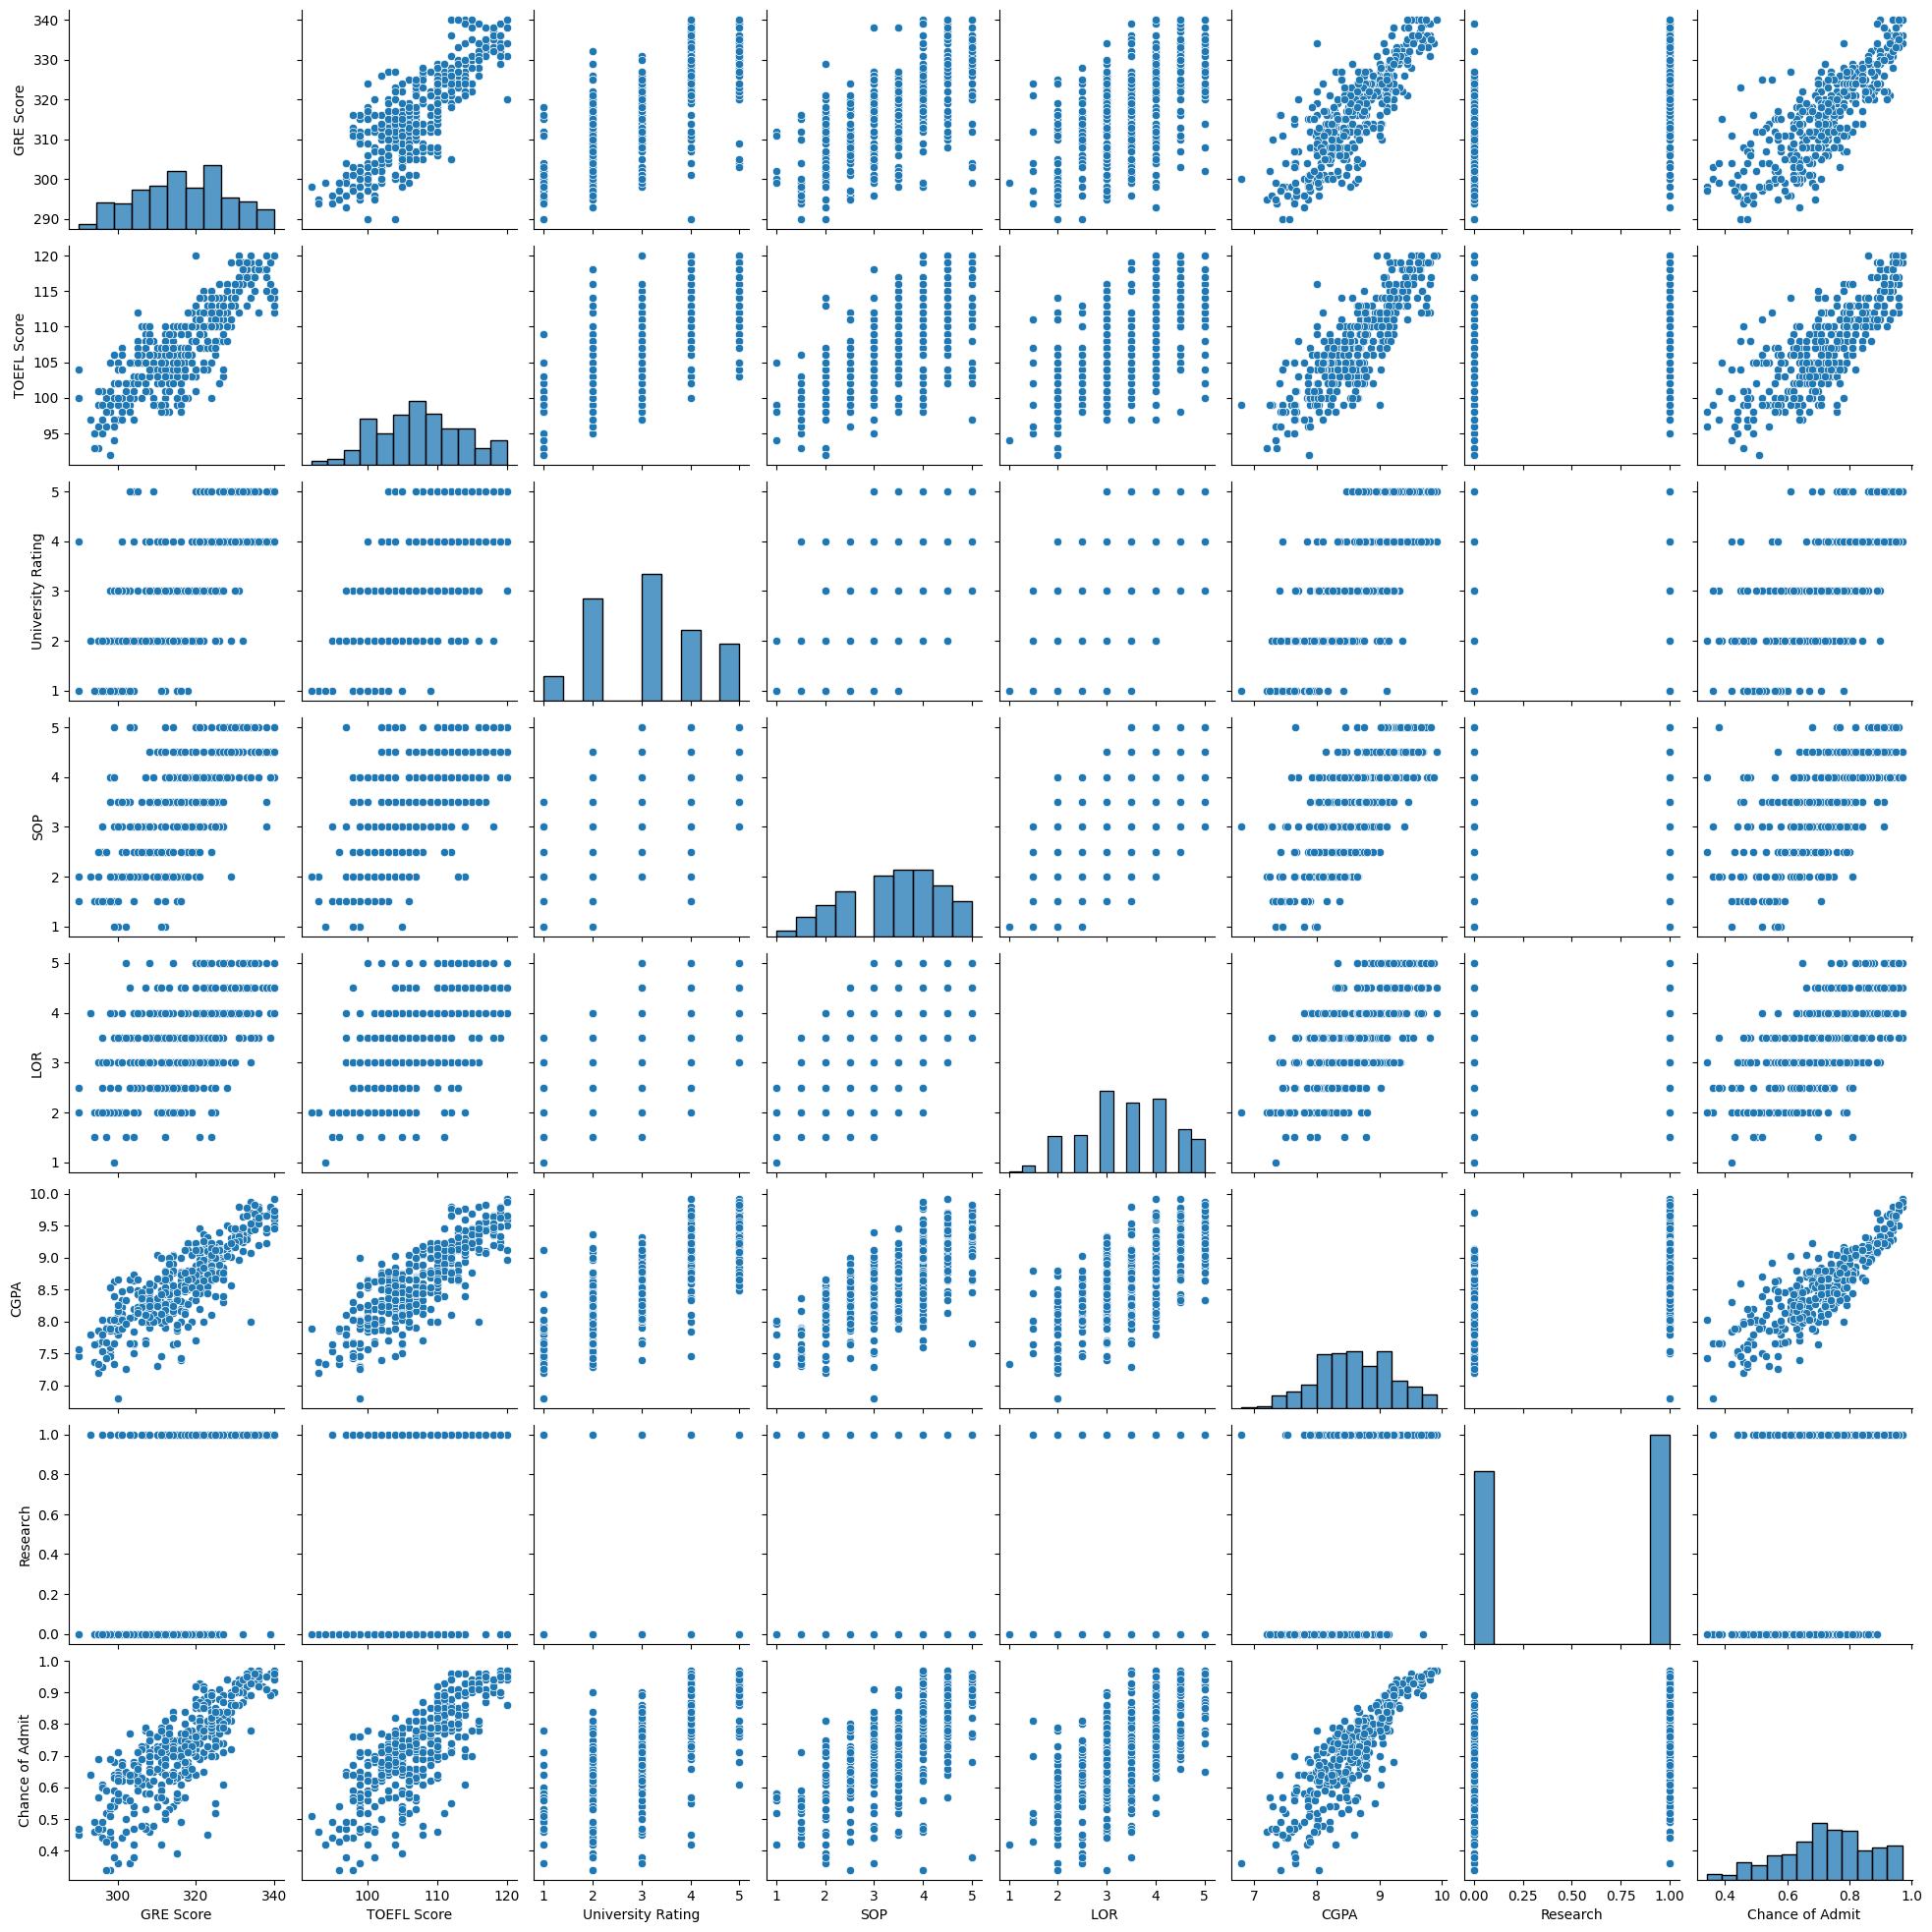

In [42]:
#plot diagram for admission data
sns.pairplot(admission)

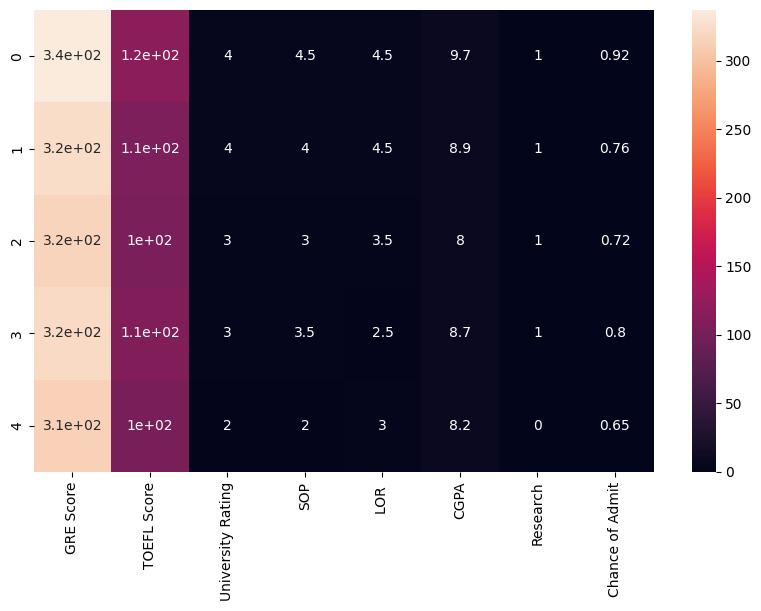

In [43]:
# heatmp for heads of admission
plt.figure(figsize=(10,6,))
sns.heatmap(admission.head(),annot=True,linewidths=0)
plt.show()


<Axes: >

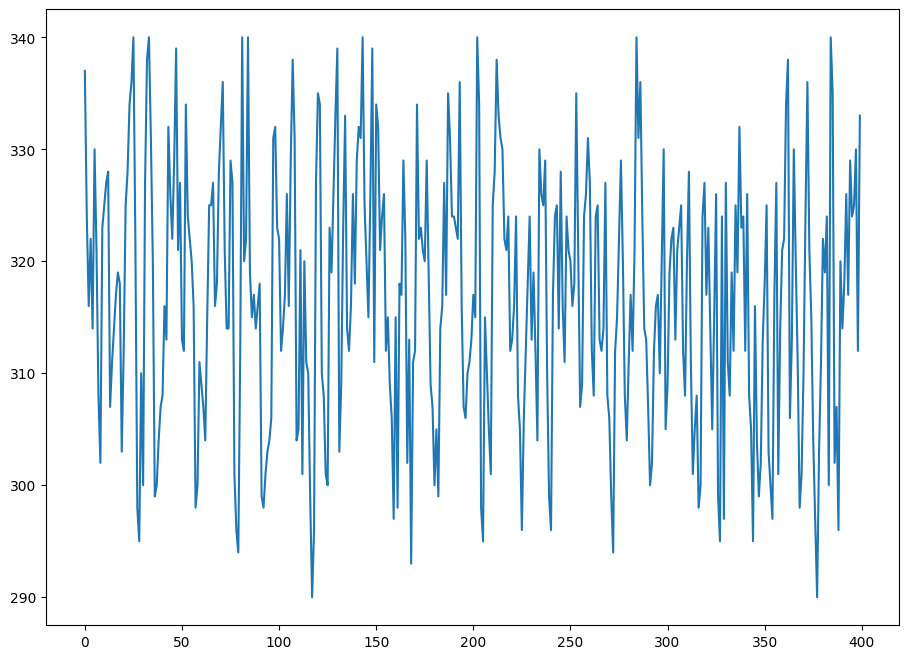

In [44]:
admission['GRE Score'].plot(figsize=(11,8))

# Splitting Input and output data

In [45]:
#x = admission.iloc[:,[0,1,2,3,4,5,6]]

X = admission.drop(columns=['Chance of Admit'])  # Features
y = admission['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [46]:
#dfgfdgdfg

#admission.rename(columns = {'Chance of Admit':'AdmitChance'}, inplace = True)
#admission.columns

# Applying Model 

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor



In [48]:
rnd_reg = RandomForestRegressor(n_estimators=100, random_state=42)
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)
dt_model = DecisionTreeRegressor(random_state=42)


rnd_reg.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [49]:
y_pred = rnd_reg.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
#Ridge_Prediction=Ridge_model.predict(x_test)


In [50]:
lasso_MSE=mean_squared_error(y_test,lasso_predictions)
ridge_MSE=mean_squared_error(y_test,ridge_predictions)
rf = mean_squared_error(y_test, y_pred)
dt = mean_squared_error(y_test, dt_predictions)

from sklearn.metrics import accuracy_score
accuracy=rnd_reg.score(X,y)
print("Mean Squared Error (MSE):", rf)
print("Lasso MSE :",lasso_MSE)
print('Ridge MSE:',ridge_MSE)
print("MSE for Decission Tree Reg :",dt)
print(accuracy)

Mean Squared Error (MSE): 0.004994038499999999
Lasso MSE : 0.020342152736628174
Ridge MSE: 0.004637004558226784
MSE for Decission Tree Reg : 0.00947375
0.9233264654917765


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test contains the actual target values
# y_pred contains the predicted target values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.04977500000000004
Mean Squared Error (MSE): 0.004994038499999999
Root Mean Squared Error (RMSE): 0.07066851137529359
Mean Absolute Percentage Error (MAPE): 8.629719661046286
R-squared (R2): 0.8066077140670239


In [52]:
admission.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [53]:
rnd_reg.predict([[330,100,1,6.0,7.5,9.4,0]])

c:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.8961])

# pickle

In [54]:
import pickle
import numpy as np

In [55]:
pickle.dump(rnd_reg, open('C:\\Users\\91939\\Desktop\\B16\\trained.pkl','wb'))

In [56]:
rnd_model=pickle.load(open('C:\\Users\\91939\\Desktop\\B16\\trained.pkl','rb'))
rnd_model.predict([[320, 110, 1, 5, 5, 9, 1]])


c:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.8162])

In [59]:
#EFRFEFGD

In [57]:
# Get feature importances
feature_importances = rnd_reg.feature_importances_

#feature_imoortance
total_importance = sum(feature_importances)

# Calculate feature importances as percentages
feature_importances_percentage = (feature_importances / total_importance) * 100

# Create a DataFrame to display feature importances as percentages
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_percentage})

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)
print(importance_df) 

total_importance

             Feature  Importance (%)
5               CGPA       72.710037
0          GRE Score       14.023097
1        TOEFL Score        4.053232
3                SOP        4.024504
4               LOR         2.242310
2  University Rating        1.541758
6           Research        1.405062


0.9999999999999999